In [ ]:
#short description for this code""
'''This notebook implements a plant disease detection system using a convolutional neural network (CNN).
The process starts by mounting Google Drive to access the dataset stored there. The dataset is provided as a zip file,
which is extracted to a working directory. The code then imports necessary libraries for data handling, image processing,
and deep learning.

Image data generators are set up for training, validation, and testing datasets. These generators handle image preprocessing,
such as rescaling pixel values and augmenting training images with rotations to improve model generalization.
The training generator also splits a portion of data for validation.

A CNN model is built using TensorFlow Keras Sequential API. It consists of multiple convolutional layers with ReLU activation,
interleaved with max-pooling layers to reduce spatial dimensions. The model is flattened and followed by dense layers to learn
complex features, ending with a softmax output layer for multi-class classification into 38 categories.

This approach leverages transfer learning principles by using data augmentation and a deep CNN architecture to effectively
classify plant diseases from images, aiming to improve accuracy and robustness of the model.'''


'This notebook implements a plant disease detection system using a convolutional neural network (CNN).\nThe process starts by mounting Google Drive to access the dataset stored there. The dataset is provided as a zip file,\nwhich is extracted to a working directory. The code then imports necessary libraries for data handling, image processing,\nand deep learning.\n\nImage data generators are set up for training, validation, and testing datasets. These generators handle image preprocessing,\nsuch as rescaling pixel values and augmenting training images with rotations to improve model generalization.\nThe training generator also splits a portion of data for validation.\n\nA CNN model is built using TensorFlow Keras Sequential API. It consists of multiple convolutional layers with ReLU activation,\ninterleaved with max-pooling layers to reduce spatial dimensions. The model is flattened and followed by dense layers to learn\ncomplex features, ending with a softmax output layer for multi-cl

In [ ]:
# Mount the drive here

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os


# Define the path to the zip file and the extraction directory
zip_file_path = "/content/drive/MyDrive/disease model/archive (2).zip"
extract_dir = "/content"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")


Successfully extracted '/content/drive/MyDrive/disease model/archive (2).zip' to '/content'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [ ]:
train='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'


In [ ]:
size=224

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

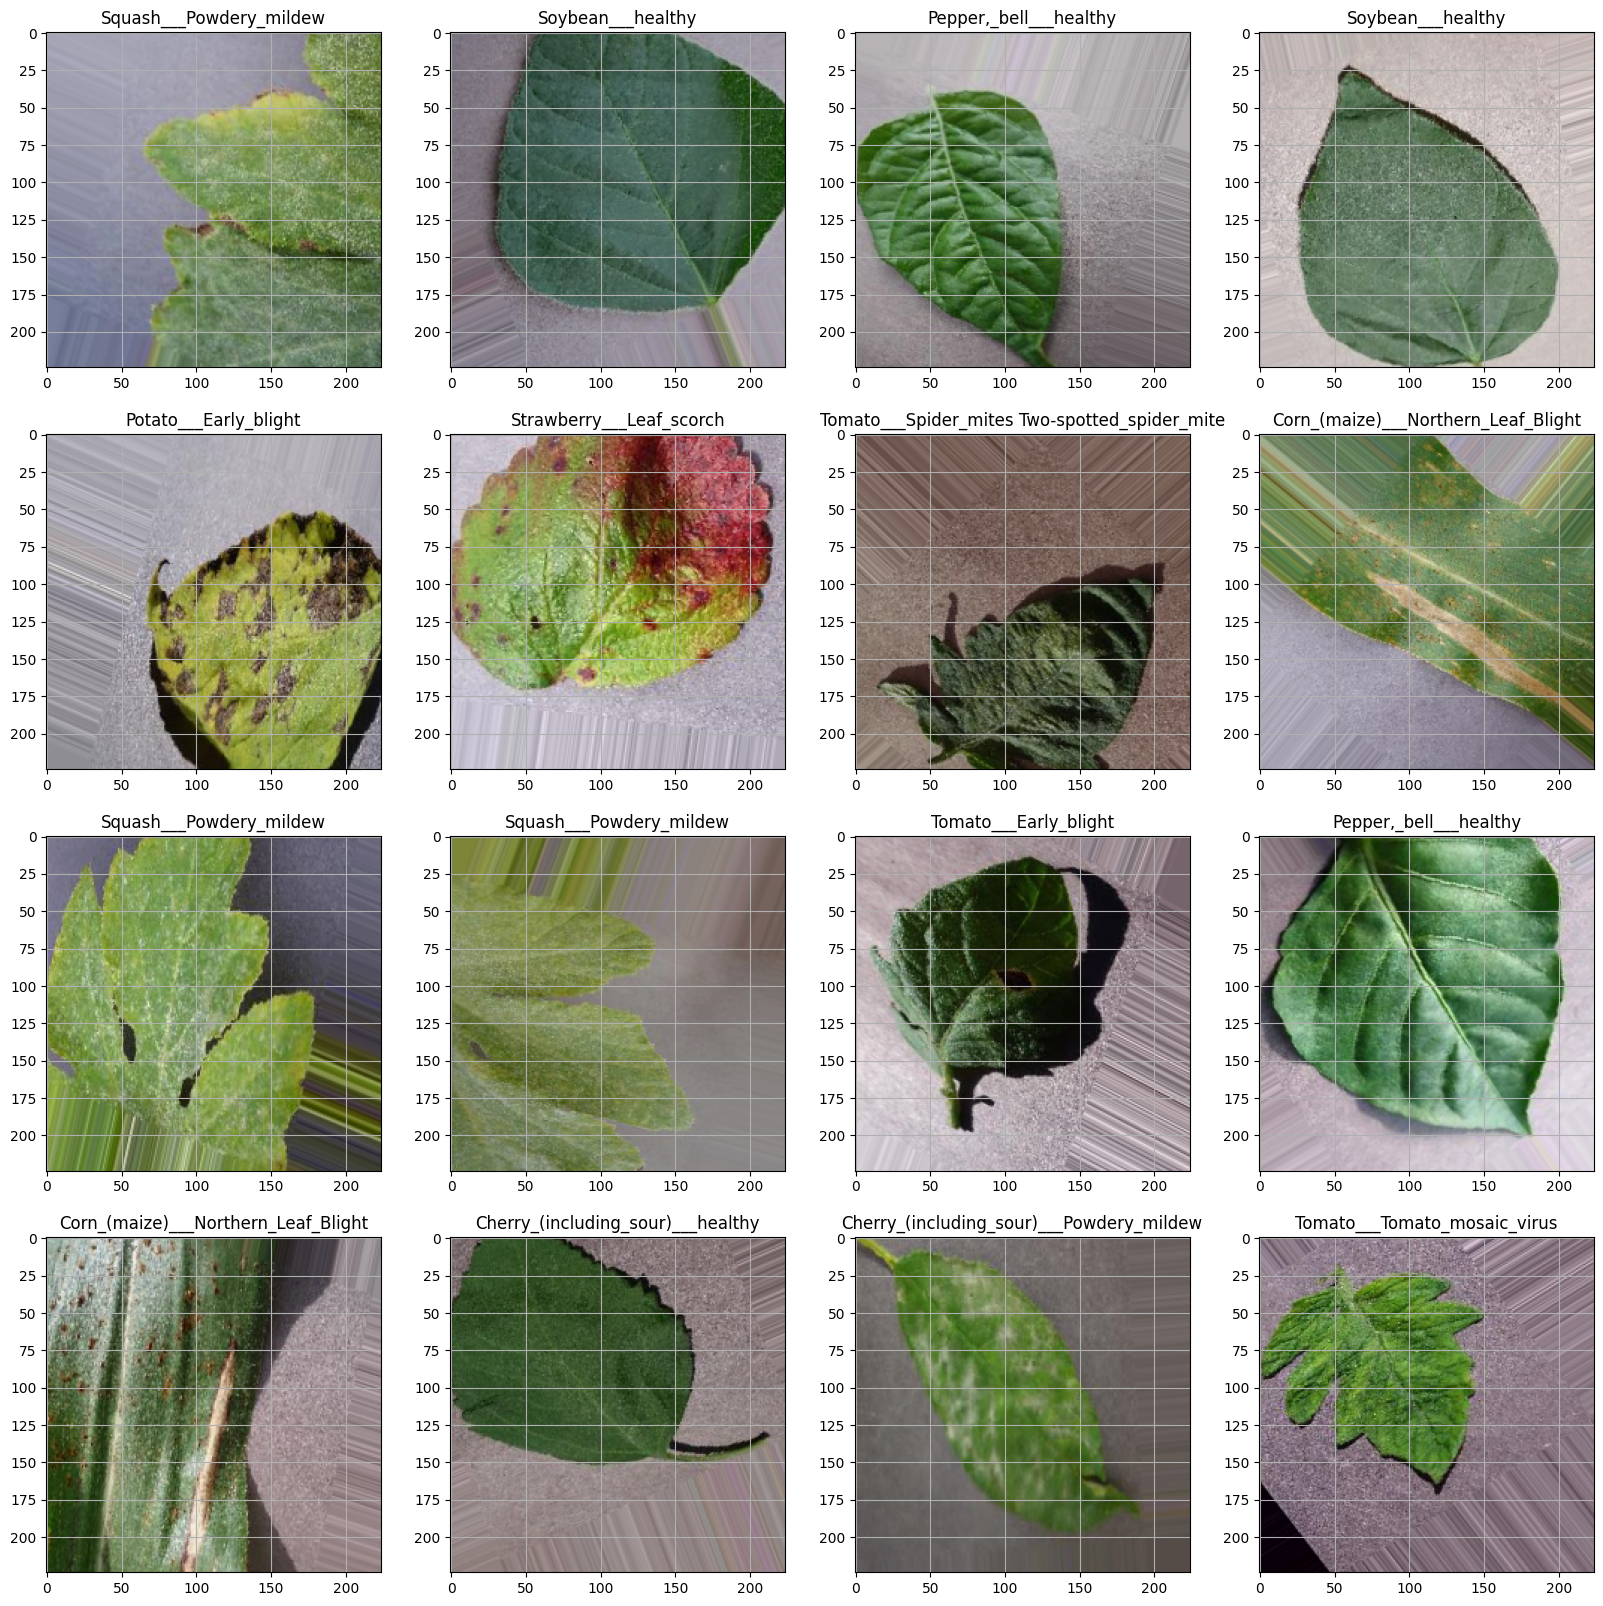

In [ ]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [ ]:
valid='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [ ]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [ ]:
test='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [ ]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()  # To build NN

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1,
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))   #flatten layer - to convert into 1d vector

model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation="softmax", name="Output"))  #output layer

# The model’s summary() method displays all the model’s layers
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks = [early_stopping, model_checkpoint, model_ReduceLROnPlateau]


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', 'precision', 'recall'])

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=callbacks)

Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 1020s 3s/step - accuracy: 0.0774 - loss: 3.5465 - precision: 0.4654 - recall: 0.0111 - val_accuracy: 0.3060 - val_loss: 2.3457 - val_precision: 0.6895 - val_recall: 0.0982 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 944s 2s/step - accuracy: 0.3923 - loss: 2.0480 - precision: 0.7084 - recall: 0.1767 - val_accuracy: 0.6320 - val_loss: 1.1889 - val_precision: 0.7692 - val_recall: 0.5126 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 936s 2s/step - accuracy: 0.6714 - loss: 1.0723 - precision: 0.8082 - recall: 0.5532 - val_accuracy: 0.7997 - val_loss: 0.6461 - val_precision: 0.8622 - val_recall: 0.7468 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 931s 2s/step - accuracy: 0.7863 - loss: 0.6700 - precision: 0.8589 - recall: 0.7234 - val_accuracy: 0.7807 - val_loss: 0.6612 - val_precision: 0.8239 - val_recall: 0.7440 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 929s 2s/step - accuracy:

In [7]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 5)


In [ ]:
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)



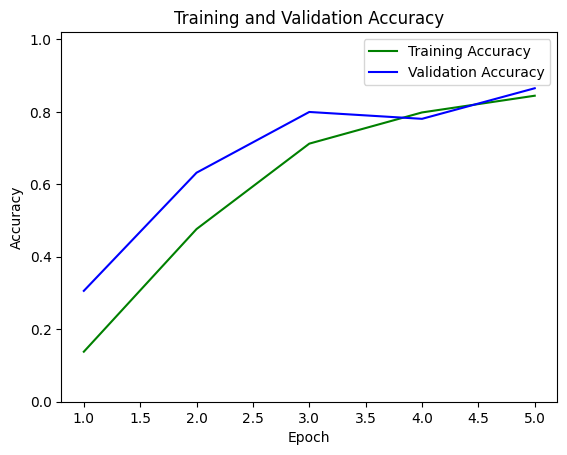

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

In [ ]:
model_evaluate = model.evaluate(test_generator)
print('Loss: ', model_evaluate[0])
print('Accuracy: ', model_evaluate[1])
print('Precision: ', model_evaluate[2])
print('Recall: ', model_evaluate[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 390ms/step - accuracy: 0.8891 - loss: 0.3333 - precision: 0.9100 - recall: 0.8738
Loss:  0.3892204761505127
Accuracy:  0.8696221113204956
Precision:  0.8946235179901123
Recall:  0.8512974977493286


In [2]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model
model = Sequential([
    Dense(10, input_shape=(5,), activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Set model save filename
filename = 'PDDS.keras'

# Save the model
model.save(filename)

# Get absolute path
full_path = os.path.abspath(filename)
print("Model saved to:", full_path)


Model saved to: /content/PDDS.keras


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.models import load_model
from google.colab import files

# Load the .keras model
model = load_model('PDDS.keras')

# Save as .h5
model.save('PDDS_converted.h5')

# Download the .h5 file
files.download('PDDS_converted.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import files
files.download('/content/PDDS.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving dataset-card (1).jpg to dataset-card (1).jpg
User uploaded file "dataset-card (1).jpg"
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Grape___Esca_(Black_Measles)
Prediction probability: 0.99
This leaf may not be healthy.


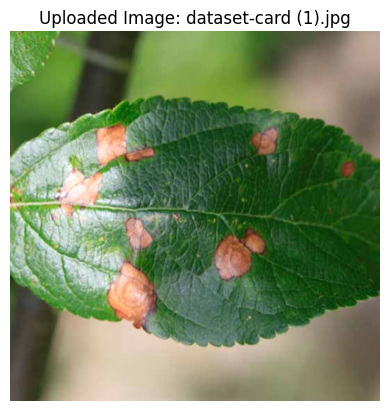

In [ ]:

from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to predict the health of a leaf image
def predict_leaf_health(model, img_path, classes):
    """
    Loads an image, preprocesses it, and predicts the class using the provided model.

    Args:
        model: The trained Keras model.
        img_path: The path to the input image file.
        classes: A list of class names in the order the model was trained on.

    Returns:
        A tuple containing the predicted class name and the prediction probability.
    """
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = classes[predicted_class_index]
    prediction_probability = predictions[0][predicted_class_index]

    return predicted_class_name, prediction_probability

# --- Code to allow user to upload an image ---
uploaded = files.upload()

# Iterate through the uploaded files (assuming only one file is uploaded)
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')
    img_path = filename

    # Get the class names from the training generator
    classes = list(train_generator.class_indices.keys())

    # Make a prediction
    predicted_class, probability = predict_leaf_health(model, img_path, classes)

    print(f"Predicted class: {predicted_class}")
    print(f"Prediction probability: {probability:.2f}")

    # You can add logic here to determine if it's "healthy" based on the predicted class name
    # This requires knowing which class names correspond to healthy leaves.
    # For example, if 'healthy' is one of your class names:
    if 'healthy' in predicted_class.lower(): # Check for 'healthy' case-insensitively
        print("This leaf appears to be healthy.")
    else:
        print("This leaf may not be healthy.")

    # Display the uploaded image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Uploaded Image: {filename}")
    plt.show()
